# Support Vector Machines

In this section of the assignment, you will get to implement Support Vector Machines which are among the best (and many believe are indeed the best)“off-the-shelf” supervised learning algorithm.

This section is further divided into 3 subsections.


*   In the first subsection, you will work on a synthetic dataset and visualize the boundary predicted by SVM. You will also vary the value of C-parameter and see how the decision boundary changes. **Please note that you cannot use inbuilt sklearn function for SVM in this sub-section**. You can only use a QCQP (Quadratically Constrained Quadratic Program) solver like CVXPY. 

  References which you may find helpful for this subsection: 
  
  1.   https://www.cvxpy.org/
  2.   https://www.cvxpy.org/examples/basic/quadratic_program.html

  Note that in this section you are expected to show how you derived the Quadratically Constrained form(which can be passed into the solver) from the basic principles of SVM algorithm
*  In the next subsection you will use be using the famous MNIST dataset to explore various kernels and report the results. **Please note you may use inbuilt sklearn SVM functions in this subsection**


In [ ]:
# !pip install numpy
# !pip install matplotlib
# !pip install cvxpy
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings('ignore')

### Subsection 1

In [ ]:
# Feel free to use this helper function to visualize 2D points X with labels +1 or -1
def plot_points(X, Y):
    reds = []
    blues = []
    for i in range(Y.shape[0]):
        if Y[i] == 1:
            reds.append(X[i])
        else:
            blues.append(X[i])
    reds = np.array(reds)
    blues = np.array(blues)
    plt.scatter(reds[:, 0], reds[:, 1], c = 'r')
    plt.scatter(blues[:, 0], blues[:, 1], c = 'b')

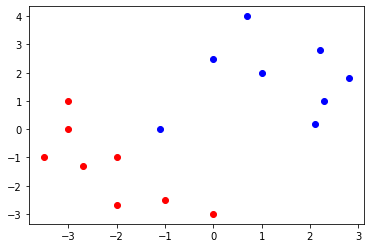

In [ ]:
# Create Synthetic Data and visualize the points
X = np.array([[-3.5, -1], [-3, 0], [-3, 1], [-2.7, -1.3], [-2, -1], [-2, -2.7], 
              [-1, -2.5], [0, -3], [-1.1, 0], [0, 2.5], [1, 2], [0.7, 4], 
              [2.1, 0.2], [2.3, 1], [2.8, 1.8], [2.2, 2.8]])
y = np.array([1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1])

plot_points(X, y)
plt.show()

In [ ]:
def lines_plot(a1,b1):
  x = np.linspace(-6,6,20)
  # print("**************")
  # print(a1)
  # print(b1)
  plt.plot(x,(-b1-(a1[0]*x))/a1[1],'k')
  plt.plot(x,(-b1-(a1[0]*x)-1)/a1[1],'b--') #negative wali line
  plt.plot(x,(-b1-(a1[0]*x)+1)/a1[1],'r--')

In [ ]:

def plot_graph_acc_to_C(X,y,C):
#hyperparamert : w,b

  b =cp.Variable()
  w= cp.Variable((np.shape(X[0])[0],1)) 
  #khali variable
  #print("wogooooo")
  #print(w,b)

  if C!=0:
    #print("*****************")
    #print(optimizer)
    #print(y[0])
    #print(cp.Variable(X.shape[0]))
    #print(type(cp.Variable(X.shape[0])))
    ss= X.shape[0]
    e=cp.Variable((ss))
    temp=cp.norm(w,2)**2
    #print(temp)
    c1 =[y[i]*( w.T*X[ i ]+b)>=1 -e[i] for i in range( len(y) )]
    c2 =[e[i]>=0 for i in range(len(y))]
    temp=temp/2
    optimizer = cp.Minimize((temp)+ C*cp.sum(e) )
    #print(optimizer)
    constraint=c1+c2
    #print(constraint)

  else:
    #print("$$$$$$$$$$$$$$$$$")
    optimizer = cp.Minimize((cp.norm(w,2)**2)/2)
    #print(optimizer)
    constraint=[y[i]* ( w.T *X[i] +b)>= 1  for i in range(len(y))]
    #print(y[0])
    #print(X[0])
    #print(constraint)

  sol=cp.Problem(optimizer ,constraint)
  sol.solve()
  
  m=w.value
  n=b.value
  print("w = ",end=" ")
  print(m)

  print("b = ",end=" ")
  print(n)

  
  plot_points(X,y)
  lines_plot(m , n)
  
  plt.show()

  return m,n

In the next cell you are required to derive the Quadratic Constrained Quadratic form of SVM **without soft constraints** from the basic principles. Start with the idea that SVM tries to maximize the margin and then derive the form which you can feed to the solver.

Please print the values of w, b. 



w =  [[-1.73913043]
 [-1.30434783]]
b =  -2.913043478291523


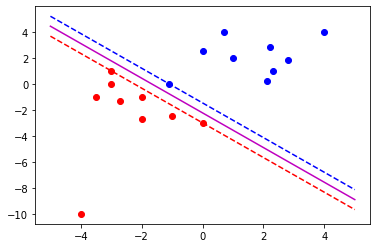

In [ ]:
m,n=plot_graph_acc_to_C(X,y,0)

**Note: You are also required to upload a page of the derivation. You may also type it in markdown here**

**Note: You cannot use sklearn SVM functions here**

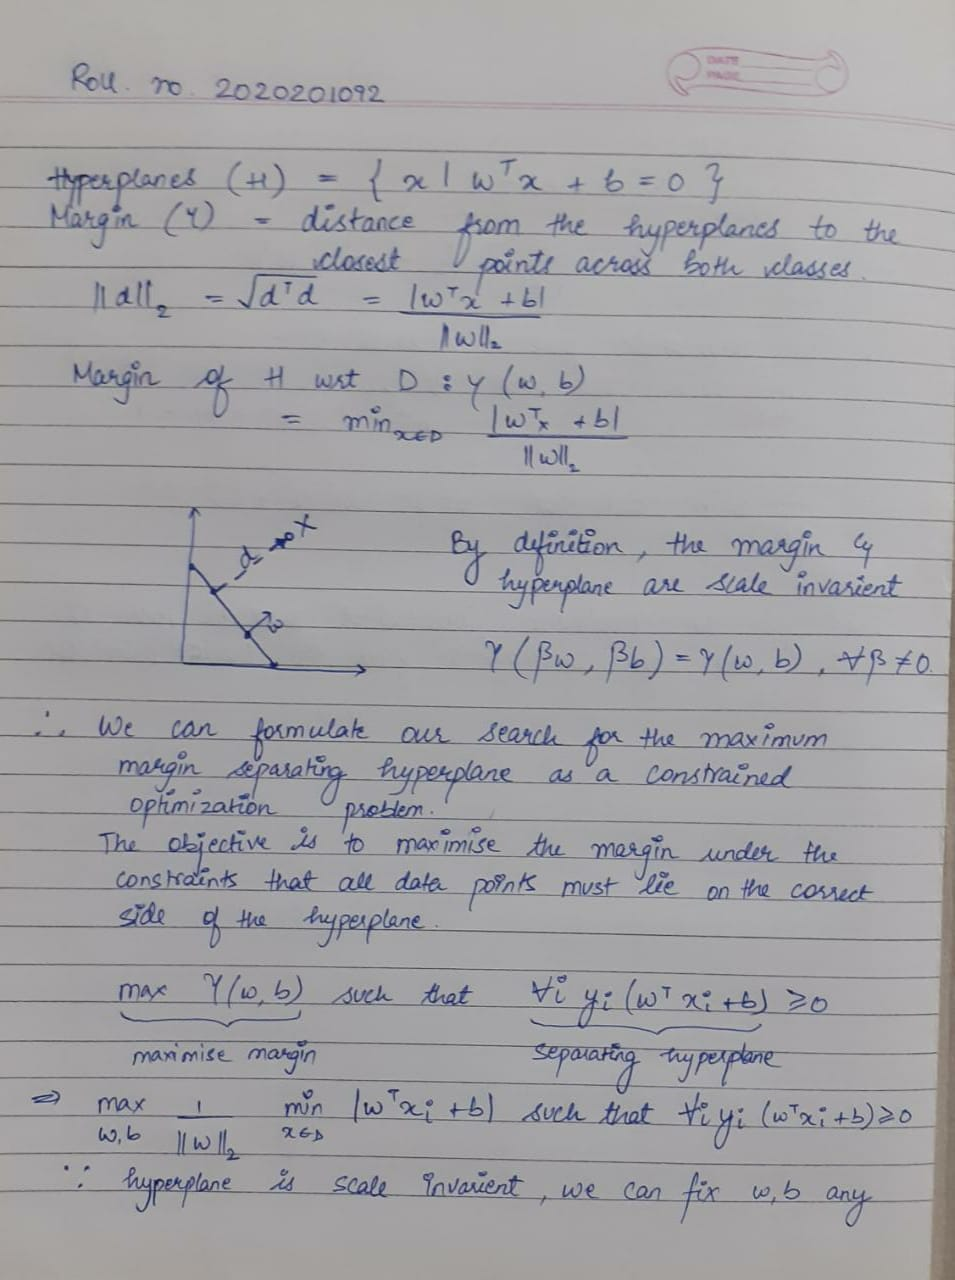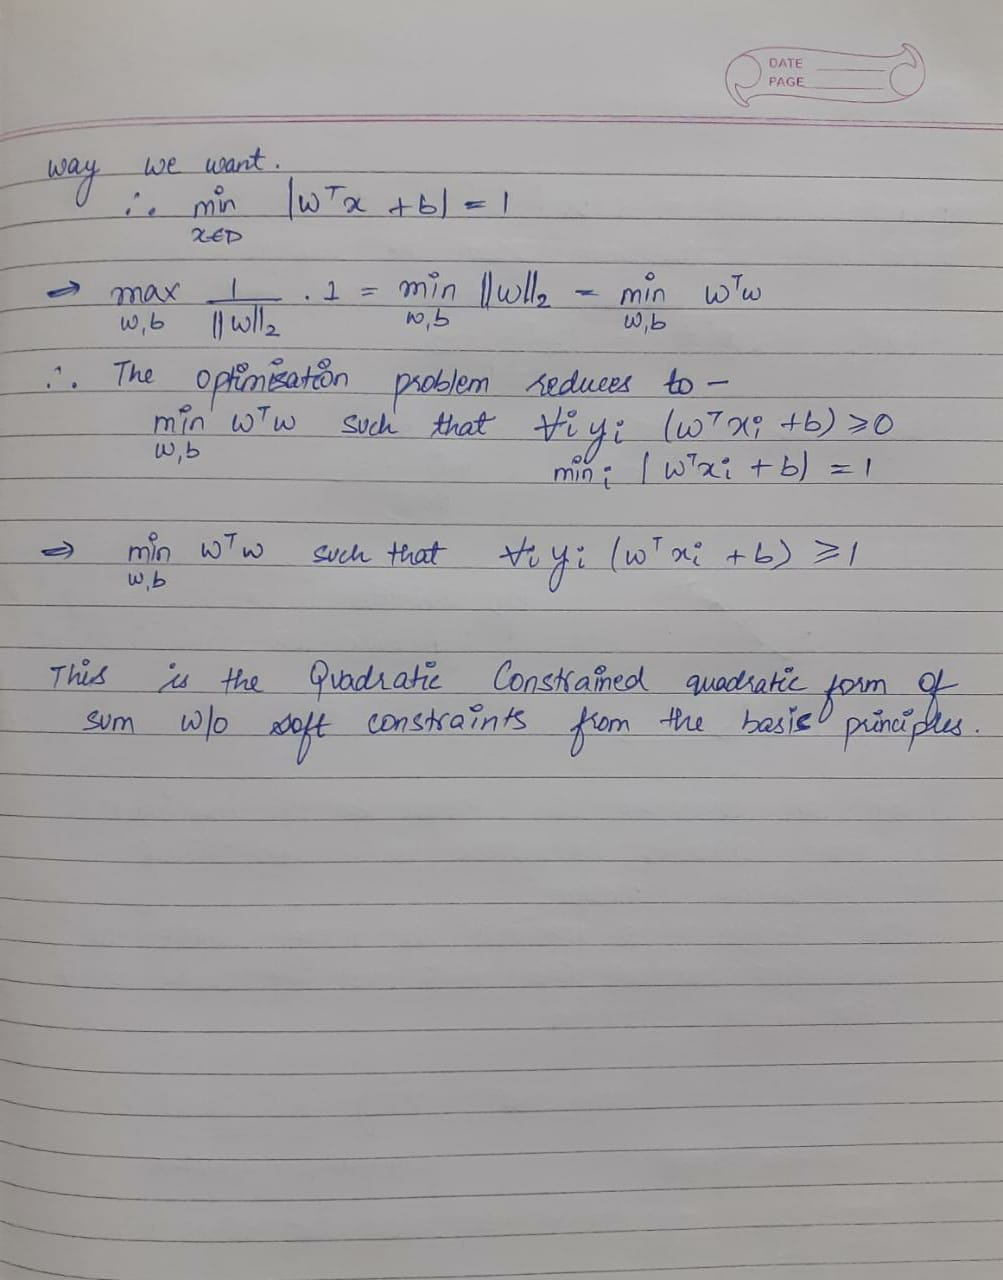

In the next cell you are required to visualize the boundary predicted by the solver. You may want to revise up on how to plot the a line given w, b. Please plot w vector as well as the margin lines

You may want to create a function to plot the line of separation as you would require this frequently in the subsequent parts of the assignment.

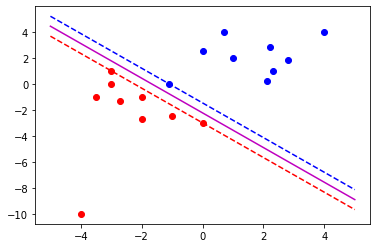

In [ ]:
# Write your code here
plot_points(X,y)
lines_plot(m, n)
plt.show()

In the next cell please plot only the support vectors along with the boundary, w vector, and margins. 

**Note: You are not supposed to hard-code the points here**

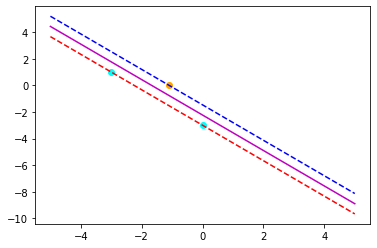

In [ ]:
# Write your code here
support1 =[]
support2= []

l=len(y)
for i in range(l):
  val =np.asarray( X[i] )
  parameter= y[i] * (np.dot(m.T, val)+n) [0]
  parameter=parameter-1
  if(parameter< 0.00000001):
    if(y[i] != 1):
      support2.append( val)
    else:
      support1.append(val )


support1=np.asarray(support1)
a=support1[:,0]
b=support1[:,1]
plt.scatter(a,b,color='cyan')


support2=np.asarray( support2)
a=support2[:,0]
b=support2[:,1]
plt.scatter(a,b,color='orange')
lines_plot(m,n)
plt.show()


In the next cell add the following points:
* (-4, -10) with label 1
* (4, 4) with label -1

**Is the decision boundary changed after adding the points? Explain your observations theoretically.**

Ans. No, because these because are at a large distance from hyperplanes, thus doesn't affect the decision boundary.

In [ ]:
# Re-create the Synthetic Data by adding the points and visualize the points
X = [[-3.5, -1],[-3, 0],[-3, 1],[-2.7, -1.3],[-2, -1],[-2, -2.7], 
              [-1, -2.5],[0, -3],[-1.1, 0],[0, 2.5],[1, 2], [0.7, 4], 
              [2.1, 0.2],[2.3, 1], [2.8, 1.8], [2.2, 2.8],[-4,-10],[4,4]]
X=np.array(X)

y = [1,1, 1,1, 1, 1,1, 1, -1,-1, -1,-1, -1,-1, -1,-1,1,-1]
y=np.array(y)


w =  [[-1.73913043]
 [-1.30434783]]
b =  -2.913043478291523


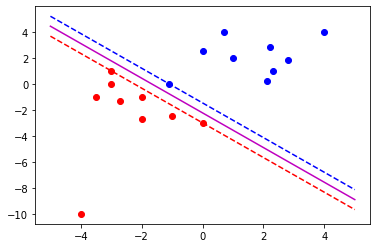

In [ ]:
# Solve for the decision boundary using this modified dataset
m, n=plot_graph_acc_to_C(X, y, 0)

In the next cell you are required to modify your framing of optimisation problem to incorporate soft constraints also known as slack. Plot the decision boundary, w and margin lines for various values of C: $0.01$, $0.1$, $3$, $10$, $100$.


**Note: Use the modified X and y i.e after adding points in previous cell**

w =  [[-0.22506809]
 [-0.19858949]]
b =  0.013672204267370152


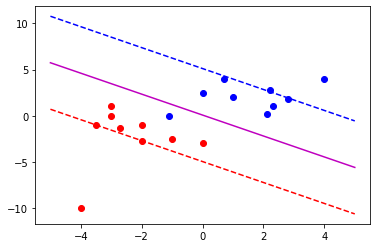

In [ ]:
# Write your code here for C= 0.01
m,n=plot_graph_acc_to_C(X,y,0.01)

w =  [[-0.38493724]
 [-0.35146444]]
b =  -0.12133891201898916


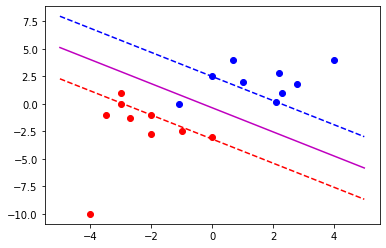

In [ ]:
# Write your code here for C= 0.1
m,n=plot_graph_acc_to_C(X,y,0.1)

w =  [[-1.73913043]
 [-1.30434783]]
b =  -2.9130434782869634


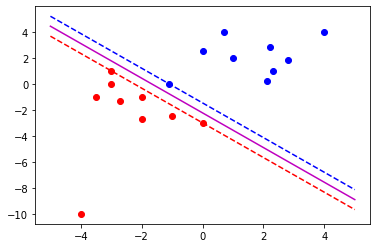

In [ ]:
# Write your code here for C= 3
m,n=plot_graph_acc_to_C(X,y,3)

w =  [[-1.73913043]
 [-1.30434783]]
b =  -2.9130434783574235


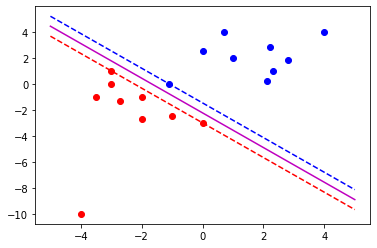

In [ ]:
# Write your code here for C= 10
m,n=plot_graph_acc_to_C(X,y,10)

w =  [[-1.73913044]
 [-1.30434783]]
b =  -2.9130434786825745


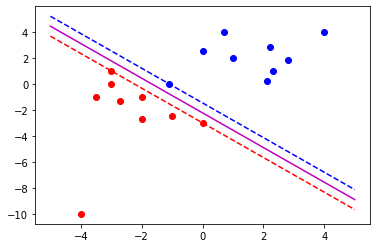

In [ ]:
# Write your code here for C= 100
m,n=plot_graph_acc_to_C(X,y,100)


**Explain your results theoretically. How does the boundary change with varying values of C? Why?**

The C parameter tells the SVM optimization how much you want to avoid misclassifying each training example. 

For a very small value of C, the cost will be less, and will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points.
For large values of C, miss classification are automatically decreased  which in returns quite perfect boundary line.

**Take the case of C = 100 and remove the support vectors. Does the boundary change after the deletion?**
**Explain why? Show your results by appropriate plots?**

Ans. Yes.
<br>
New Support Vectors will be calculated.
The decision boundary will be shifted or formed according to these new support vectors.

w =  [[-0.38493724]
 [-0.35146444]]
b =  -0.12133891214351254


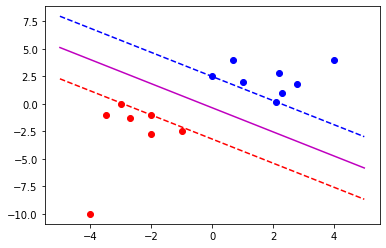

In [ ]:
# Write your Code here

X1 = []
y1 = []
lenth=len(y)
for i in range(lenth):
  pp= X[i]
  val=np.asarray(pp)
  parameter= y[i]*(np.dot(m.T,val)+n)[0]
  parameter=parameter-1
  
  if(parameter<0.00000001):
    continue    
  X1.append( val )
  y1.append(y[i])

final_x= np.asarray(X1)
final_y =np.asarray(y1)

m,n=plot_graph_acc_to_C(final_x,final_y,100)

### Subsection 2

In [ ]:
!pip install python-mnist
# !rm -rf samples
# !mkdir samples
# !wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz -P samples/
# !gunzip samples/train-images-idx3-ubyte.gz
# !wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz -P samples/
# !gunzip samples/train-labels-idx1-ubyte.gz
# !wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz -P samples/
# !gunzip samples/t10k-images-idx3-ubyte.gz
# !wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz -P samples/
# !gunzip samples/t10k-labels-idx1-ubyte.gz

In [ ]:
!mkdir samples
%cd samples/
from google.colab import files
uploaded=files.upload()
%cd ..


/content/samples/samples/samples


Saving train-labels-idx1-ubyte to train-labels-idx1-ubyte
Saving train-images-idx3-ubyte to train-images-idx3-ubyte
Saving t10k-labels-idx1-ubyte to t10k-labels-idx1-ubyte
Saving t10k-images-idx3-ubyte to t10k-images-idx3-ubyte
/content/samples/samples


In [ ]:
# Import Relevant Packages
from sklearn.svm import SVC
import numpy as np
from mnist.loader import MNIST

In [ ]:
mndata = MNIST('samples')

# Load training dataset
images, labels = mndata.load_training()
l = len(labels)
images_train = np.array(images)
labels_train = np.array(labels)

#print(images_train.shape)
#print(labels_train.shape)

(60000, 784)
(60000,)


In [ ]:
# Load testing dataset
images, labels = mndata.load_testing()
l = len(labels)
images_test = np.array(images)
labels_test = np.array(labels)

#print(images_test.shape)
#print(labels_test.shape)

(10000, 784)
(10000,)


In [ ]:
train_images1=images_train[:13000]
train_labels1=labels_train[:13000]
test_images1=images_test[:4000]
test_labels1=labels_test[:4000]

- Tweak different parameters like the C Parameter and gamma parameter of the Linear SVM and report the results.
- Experiment different kernels for classification and report the results.

Report accuracy score, F1-score, Confusion matrix and any other metrics you feel useful.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


ll=[0.01,0.1, 3, 10, 100]
kernel_list=['linear','poly']
gamma_list=['auto','scale']

for l in ll:
  for k in kernel_list:
    for g in gamma_list:
      print("******************************************")
      svc_model=SVC(kernel=k,C=l,gamma=g)
      svc_model.fit(train_images1,train_labels1)
      labels_pred=svc_model.predict(test_images1)
      print("for c=",end=" ")
      print(l)
      print("Kernel =",end=" ")
      print(k)
      print("Gamma =",end=" ")
      print(g)
      print()
      print("1. Accuracy Score between labels predicted and labels_test",end=" ")
      print(accuracy_score(labels_pred, test_labels1))
      print("2. Confusion Matrix: ")
      print()
      print(confusion_matrix(labels_pred, test_labels1))
      print("3. Classification Report")
      print()
      print(classification_report(labels_pred,test_labels1))
      print("******************************************")




******************************************
for c= 0.01
Kernel = linear
Gamma = auto

1. Accuracy Score between labels predicted and labels_test 0.8885
2. Confusion Matrix: 

[[356   0   4   3   0  10   6   1   5   3]
 [  0 442   0   2   0   1   4   6   6   6]
 [  5   3 370   8   5   6   9  13  11   0]
 [  0   1  14 360   0  27   0   7  24  12]
 [  0   1   2   2 390   1   5   7   5  22]
 [  4   0   2  17   0 301   8   0  19   1]
 [  4   3   7   2   5   3 344   0   1   1]
 [  0   0   5   6   3   1   1 358   2  17]
 [  1   0  11   6   1  18   1   2 309   5]
 [  0   0   3   2  14   4   0  17   2 324]]
3. Classification Report

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       388
           1       0.98      0.95      0.96       467
           2       0.89      0.86      0.87       430
           3       0.88      0.81      0.84       445
           4       0.93      0.90      0.91       435
           5       0.81      0.86      0.83 

The best accuracy was found when Kernl = Poly.